# Metrics and Plots for the trained models

In [5]:
seed=0

In [6]:
MAIN_DUMP=f'../../dump_seeds/dump_{seed}'
import os,sys
from joblib import Parallel, delayed,dump,load

sys.path.append(os.path.abspath('../../src/ml'))
from load_matrix import load_df
from model_trainer import MLModel
from utils import load_models

import pandas as pd

from evaluator import Evaluator
from collector import ResultsCollector
from visualizer import DashboardVisualizer


## v2.10

In [7]:
current_version='v2.10'
standard_models=load_models(MAIN_DUMP,version=current_version,normalization='standard')
robust_models=load_models(MAIN_DUMP,version=current_version,normalization='robust')
none_models =load_models(MAIN_DUMP,version=current_version,normalization='none')
log1p_models=load_models(MAIN_DUMP,version=current_version,normalization='log1p')
minmax_models=load_models(MAIN_DUMP,version=current_version,normalization='minmax')

In [8]:
collector = ResultsCollector()
metrics_list = []
metrics_list=[]
for norm in ['none','robust','standard','log1p','minmax']:
        current_dict=eval(f"{norm}_models")
        for model_name, ml_model in current_dict.items():
                print(f'-- Evaluating model: {model_name} {current_version} {norm} --')
                y_test, y_pred, y_proba = ml_model.y_test, ml_model.y_pred, ml_model.y_proba
                metrics = Evaluator(y_test, y_pred, y_proba).compute_metrics()
                metrics_list.append({
                        "model": ml_model.model_type,
                        "input": ml_model.dataset_name,
                        "normalization": norm,  
                        "version": current_version,
                        **metrics
                })

                collector.add(ml_model.model_type, ml_model.dataset_name, y_test, y_pred, y_proba)
results=pd.DataFrame(metrics_list)

# -- gex not related to version
results.loc[results['input']=='gene_expression', 'version'] = ''

-- Evaluating model: random_forest_Complex_protein_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: random_forest_Complex_sample_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: random_forest_concatenated_protein_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: random_forest_concatenated_sample_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: random_forest_gene_expression_gridsearch_model.joblib v2.10 none --
-- Evaluating model: random_forest_RGCN_protein_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: random_forest_RGCN_sample_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: sklearn_mlp_Complex_protein_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: sklearn_mlp_Complex_sample_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluating model: sklearn_mlp_concatenated_protein_embeddings_gridsearch_model.joblib v2.10 none --
-- Evaluatin

In [9]:
results[results['input']=='gene_expression'] # -- checking version

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
4,random_forest,gene_expression,none,,0.714115,0.860465,0.973684,0.913580,0.545073,0.921053,0.976706,0.105057
11,sklearn_mlp,gene_expression,none,,0.500000,0.775510,1.000000,0.873563,0.000000,0.500000,0.775510,0.244545
18,svm,gene_expression,none,,0.928230,0.972973,0.947368,0.960000,0.831005,0.983254,0.995719,0.044694
25,xgboost,gene_expression,none,,0.869617,0.945946,0.921053,0.933333,0.717264,0.913876,0.971725,0.087671


In [10]:
results_10=results

In [11]:
results.loc[results['model']=='svm']

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
14,svm,Complex_protein_embeddings,none,v2.10,0.500000,0.775510,1.000000,0.873563,0.000000,0.930622,0.980857,0.095701
15,svm,Complex_sample_embeddings,none,v2.10,0.500000,0.775510,1.000000,0.873563,0.000000,0.622010,0.863608,0.167282
16,svm,concatenated_protein_embeddings,none,v2.10,0.500000,0.775510,1.000000,0.873563,0.000000,0.509569,0.807459,0.174280
17,svm,concatenated_sample_embeddings,none,v2.10,0.500000,0.775510,1.000000,0.873563,0.000000,0.538278,0.777521,0.173975
18,svm,gene_expression,none,,0.928230,0.972973,0.947368,0.960000,0.831005,0.983254,0.995719,0.044694
19,svm,RGCN_protein_embeddings,none,v2.10,0.500000,0.775510,1.000000,0.873563,0.000000,0.509569,0.807459,0.174571
20,svm,RGCN_sample_embeddings,none,v2.10,0.500000,0.775510,1.000000,0.873563,0.000000,0.538278,0.777521,0.173974
34,svm,Complex_protein_embeddings,robust,v2.10,0.655502,0.837209,0.947368,0.888889,0.395863,0.714115,0.825616,0.152093
35,svm,concatenated_protein_embeddings,robust,v2.10,0.500000,0.775510,1.000000,0.873563,0.000000,0.423445,0.779231,0.173914
36,svm,RGCN_protein_embeddings,robust,v2.10,0.500000,0.775510,1.000000,0.873563,0.000000,0.423445,0.779231,0.173915


## v2.11

In [12]:
current_version='v2.11'
standard_models=load_models(MAIN_DUMP,version=current_version,normalization='standard')
robust_models=load_models(MAIN_DUMP,version=current_version,normalization='robust')
none_models =load_models(MAIN_DUMP,version=current_version,normalization='none')
log1p_models=load_models(MAIN_DUMP,version=current_version,normalization='log1p')
minmax_models=load_models(MAIN_DUMP,version=current_version,normalization='minmax')

collector = ResultsCollector()
metrics_list = []
metrics_list=[]
for norm in ['none','robust','standard','log1p','minmax']:
        current_dict=eval(f"{norm}_models")
        for model_name, ml_model in current_dict.items():
                print(f'-- Evaluating model: {model_name} {current_version} {norm} --')
                y_test, y_pred, y_proba = ml_model.y_test, ml_model.y_pred, ml_model.y_proba
                metrics = Evaluator(y_test, y_pred, y_proba).compute_metrics()
                metrics_list.append({
                        "model": ml_model.model_type,
                        "input": ml_model.dataset_name,
                        "normalization": norm,  
                        "version": current_version,
                        **metrics
                })

                collector.add(ml_model.model_type, ml_model.dataset_name, y_test, y_pred, y_proba)
results=pd.DataFrame(metrics_list)
results.loc[results['input']=='gene_expression', 'version'] = ''

-- Evaluating model: random_forest_Complex_protein_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: random_forest_Complex_sample_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: random_forest_concatenated_protein_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: random_forest_concatenated_sample_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: random_forest_RGCN_protein_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: random_forest_RGCN_sample_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: sklearn_mlp_Complex_protein_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: sklearn_mlp_Complex_sample_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: sklearn_mlp_concatenated_protein_embeddings_gridsearch_model.joblib v2.11 none --
-- Evaluating model: sklearn_mlp_concatenated_sample_embeddings_gridsearch_model.joblib v2.11 none --

In [13]:
results_11=results

### saving csv

In [14]:
results_10.to_csv(f'../../results/tables/scores_v2.10_seed{seed}.csv',index=False)
results_11.to_csv(f'../../results/tables/scores_v2.11_seed{seed}.csv',index=False)

all_results=pd.concat([results_10,results_11],axis=0)
all_results.to_csv(f'../../results/tables/scores_all_seed{seed}.csv',index=False)

### analysis

In [15]:
from IPython.display import display
display(all_results)

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
0,random_forest,Complex_protein_embeddings,none,v2.10,0.778708,0.897436,0.921053,0.909091,0.577079,0.925837,0.979335,0.098828
1,random_forest,Complex_sample_embeddings,none,v2.10,0.500000,0.775510,1.000000,0.873563,0.000000,0.270335,0.675974,0.201608
2,random_forest,concatenated_protein_embeddings,none,v2.10,0.824163,0.921053,0.921053,0.921053,0.648325,0.947368,0.985782,0.085299
3,random_forest,concatenated_sample_embeddings,none,v2.10,0.577751,0.804348,0.973684,0.880952,0.270636,0.478469,0.798355,0.190975
4,random_forest,gene_expression,none,,0.714115,0.860465,0.973684,0.913580,0.545073,0.921053,0.976706,0.105057
...,...,...,...,...,...,...,...,...,...,...,...,...
67,svm,concatenated_protein_embeddings,minmax,v2.11,0.824163,0.921053,0.921053,0.921053,0.648325,0.918660,0.976031,0.096490
68,svm,RGCN_protein_embeddings,minmax,v2.11,0.824163,0.921053,0.921053,0.921053,0.648325,0.918660,0.976031,0.096490
69,xgboost,Complex_protein_embeddings,minmax,v2.11,0.901914,0.971429,0.894737,0.931507,0.742426,0.942584,0.984163,0.084543
70,xgboost,concatenated_protein_embeddings,minmax,v2.11,0.915072,0.972222,0.921053,0.945946,0.784546,0.954545,0.986396,0.075406


## Viz

In [31]:
version='v2.11'
norm='none'
filtered_results=all_results[((all_results['version']==version) | (all_results['input']=='gene_expression')) & (all_results['normalization']==norm)]
# --remove last 4 rows which are duplicates of gene_expression with different version (ne seed version with 2 gex for 2 versions)
# filtered_results=filtered_results[:-5]


### 1. grouped bar plots

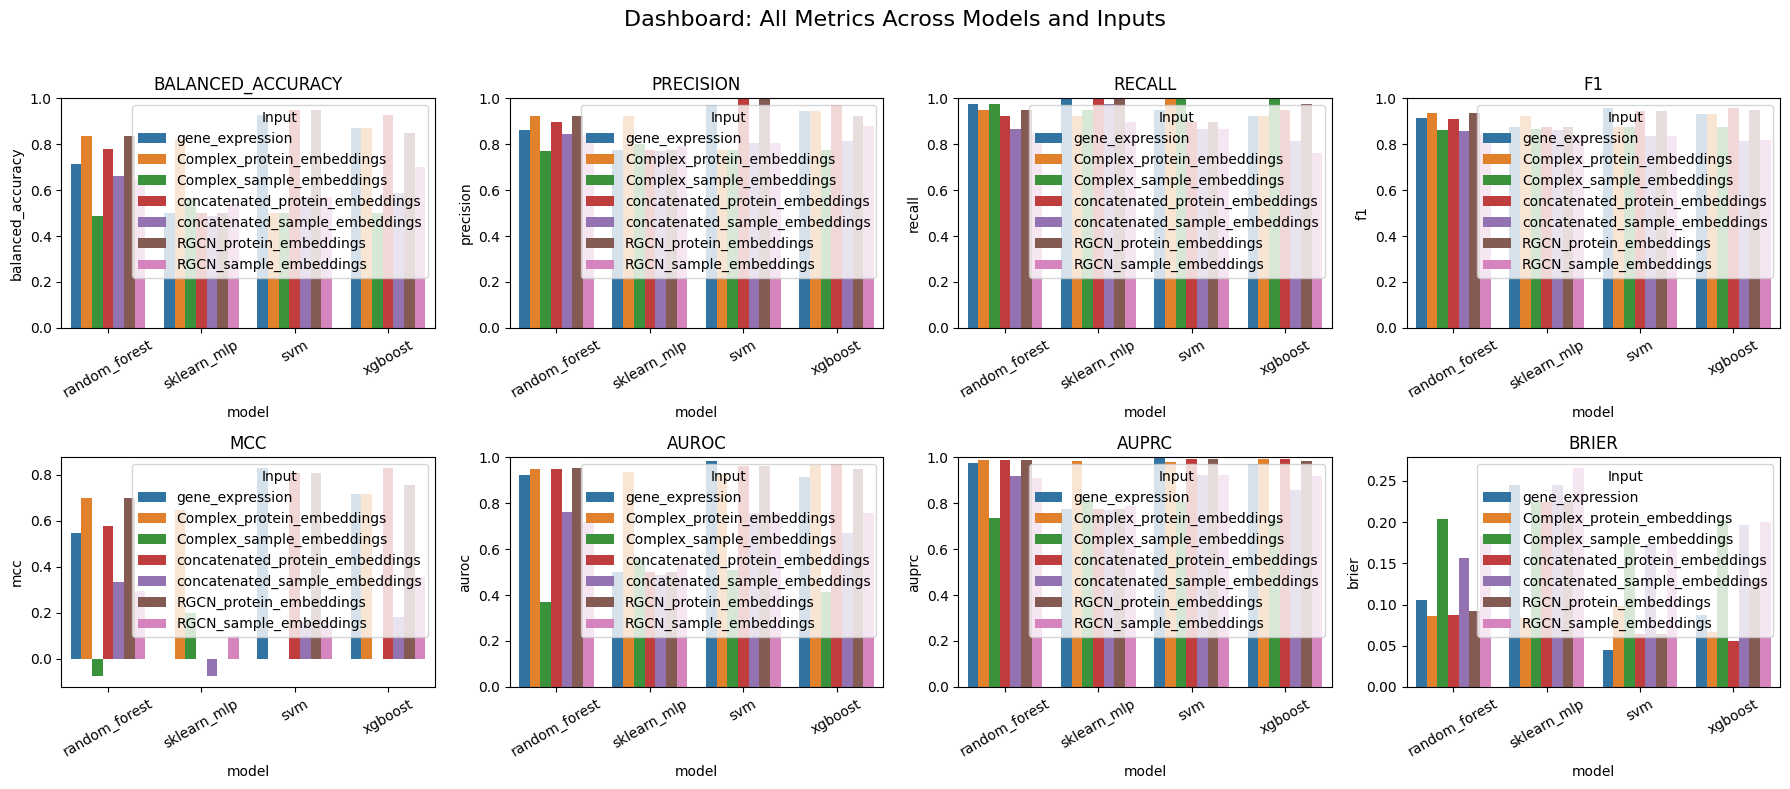

In [32]:
collector = ResultsCollector()
dashboard = DashboardVisualizer(filtered_results, collector)
dashboard.plot_metric_grid()

### 2. heatmap

model_dataset x score matrix 

In [18]:
# metric='balanced_accuracy'

In [33]:
filtered_results

,model,input,normalization,version,balanced_accuracy,precision,recall,f1,mcc,auroc,auprc,brier
4,random_forest,gene_expression,none,,0.714115,0.860465,0.973684,0.913580,0.545073,0.921053,0.976706,0.105057
11,sklearn_mlp,gene_expression,none,,0.500000,0.775510,1.000000,0.873563,0.000000,0.500000,0.775510,0.244545
18,svm,gene_expression,none,,0.928230,0.972973,0.947368,0.960000,0.831005,0.983254,0.995719,0.044694
25,xgboost,gene_expression,none,,0.869617,0.945946,0.921053,0.933333,0.717264,0.913876,0.971725,0.087671
0,random_forest,Complex_protein_embeddings,none,v2.11,0.837321,0.923077,0.947368,0.935065,0.698439,0.949761,0.986898,0.085973
1,random_forest,Complex_sample_embeddings,none,v2.11,0.486842,0.770833,0.973684,0.860465,-0.077658,0.368421,0.737230,0.203568
2,random_forest,concatenated_protein_embeddings,none,v2.11,0.778708,0.897436,0.921053,0.909091,0.577079,0.947368,0.986208,0.087862
3,random_forest,concatenated_sample_embeddings,none,v2.11,0.661483,0.846154,0.868421,0.857143,0.334359,0.760766,0.916749,0.155877
4,random_forest,RGCN_protein_embeddings,none,v2.11,0.837321,0.923077,0.947368,0.935065,0.698439,0.952153,0.986853,0.092575
5,random_forest,RGCN_sample_embeddings,none,v2.11,0.648325,0.842105,0.842105,0.842105,0.296651,0.717703,0.908639,0.182916


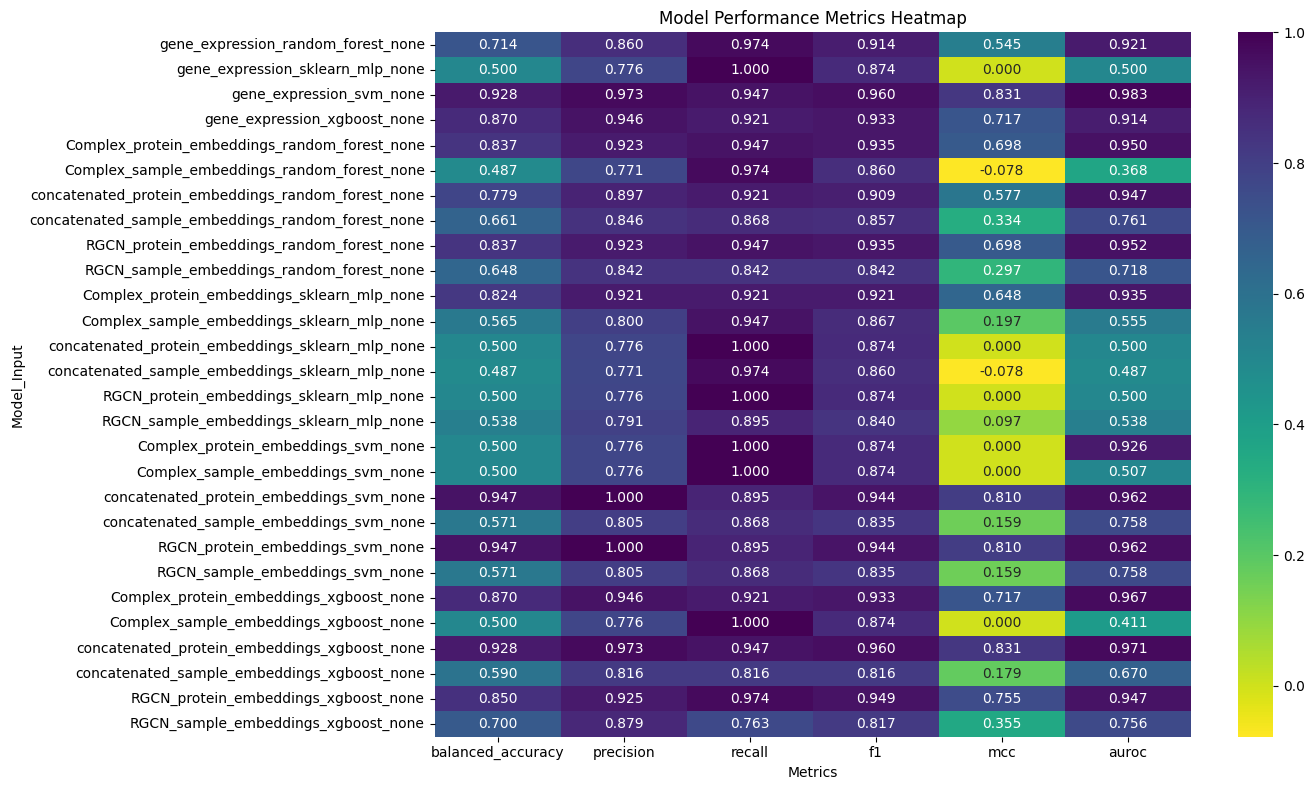

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

metrics = ['balanced_accuracy', 'precision', 'recall', 'f1', 'mcc', 'auroc']
filtered_results['model_input'] = filtered_results['input'] + '_' + filtered_results['model'] + '_' + filtered_results['normalization']
heatmap_data = filtered_results.set_index('model_input')[metrics]

plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, annot=True, cmap="viridis_r", fmt=".3f")
plt.title("Model Performance Metrics Heatmap")
plt.ylabel("Model_Input")
plt.xlabel("Metrics")

plt.yticks(rotation=0) 
plt.tight_layout()
plt.show()


### 3. radar plot

To be more readbale better make a radar plot per model (one for svm, one for xgboost...)

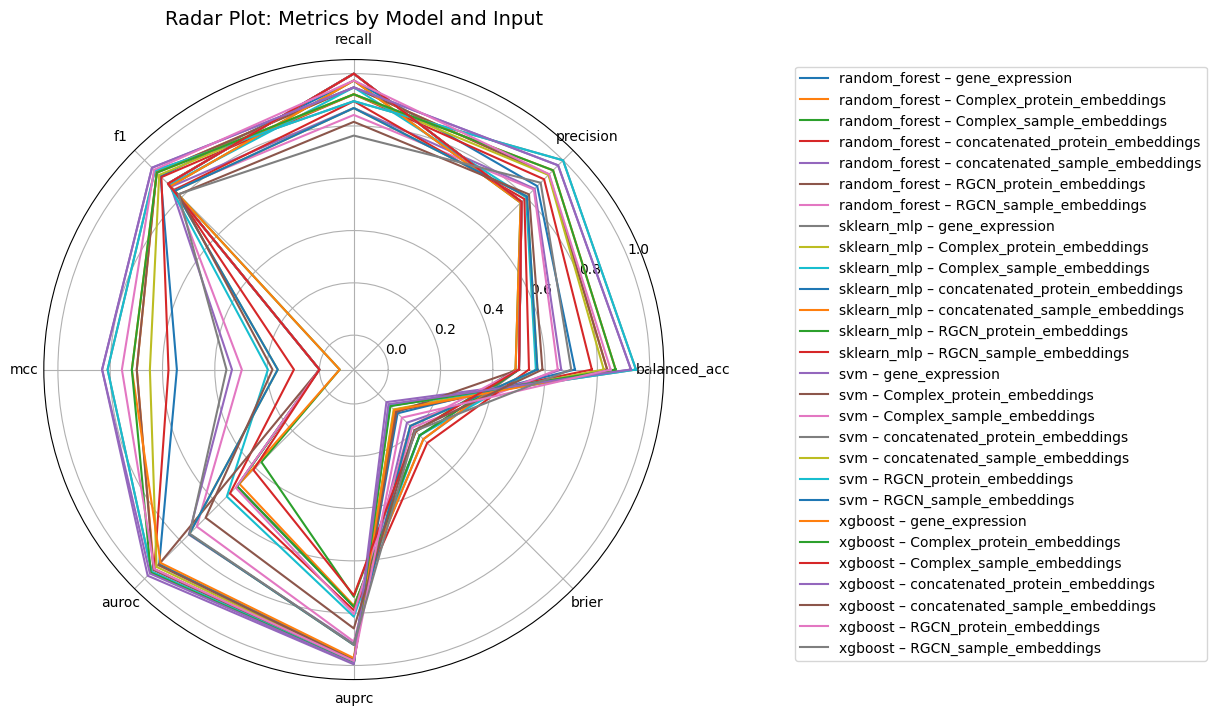

In [35]:
dashboard.plot_radar()

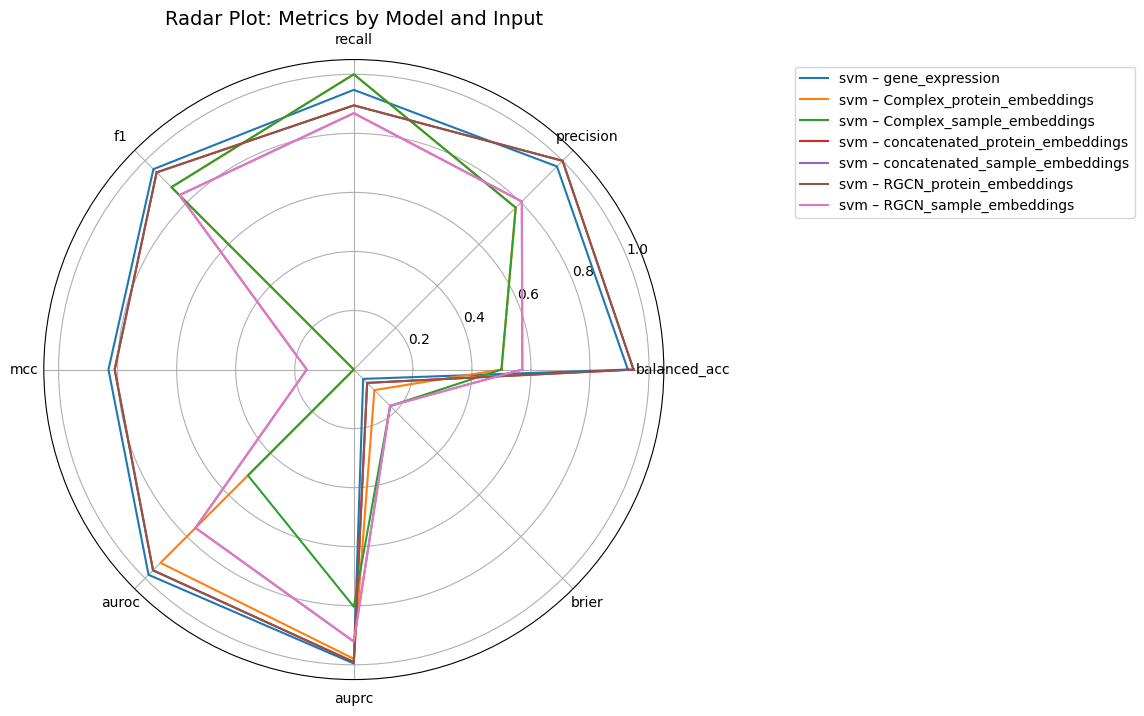

In [36]:
collector = ResultsCollector()
svm_filtered_results=filtered_results[filtered_results['model']=='svm']
dashboard = DashboardVisualizer(svm_filtered_results, collector)
dashboard.plot_radar()

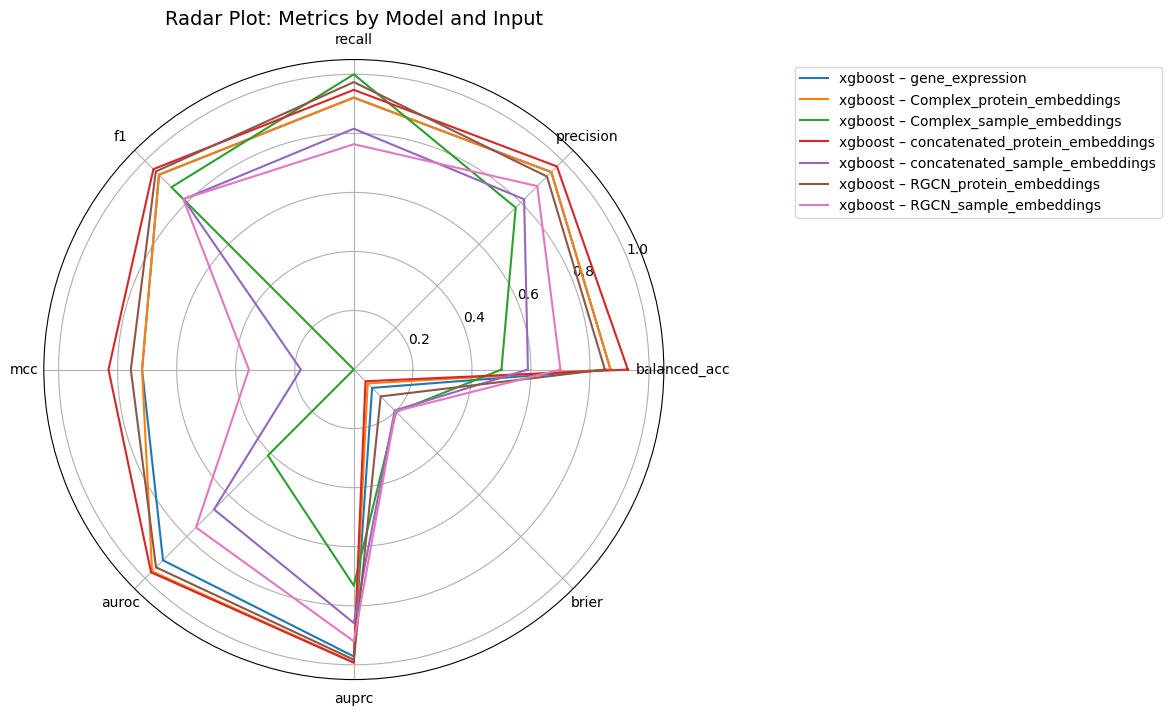

In [37]:
collector = ResultsCollector()
xgboost_filtered_results=filtered_results[filtered_results['model']=='xgboost']
dashboard = DashboardVisualizer(xgboost_filtered_results, collector)
dashboard.plot_radar()


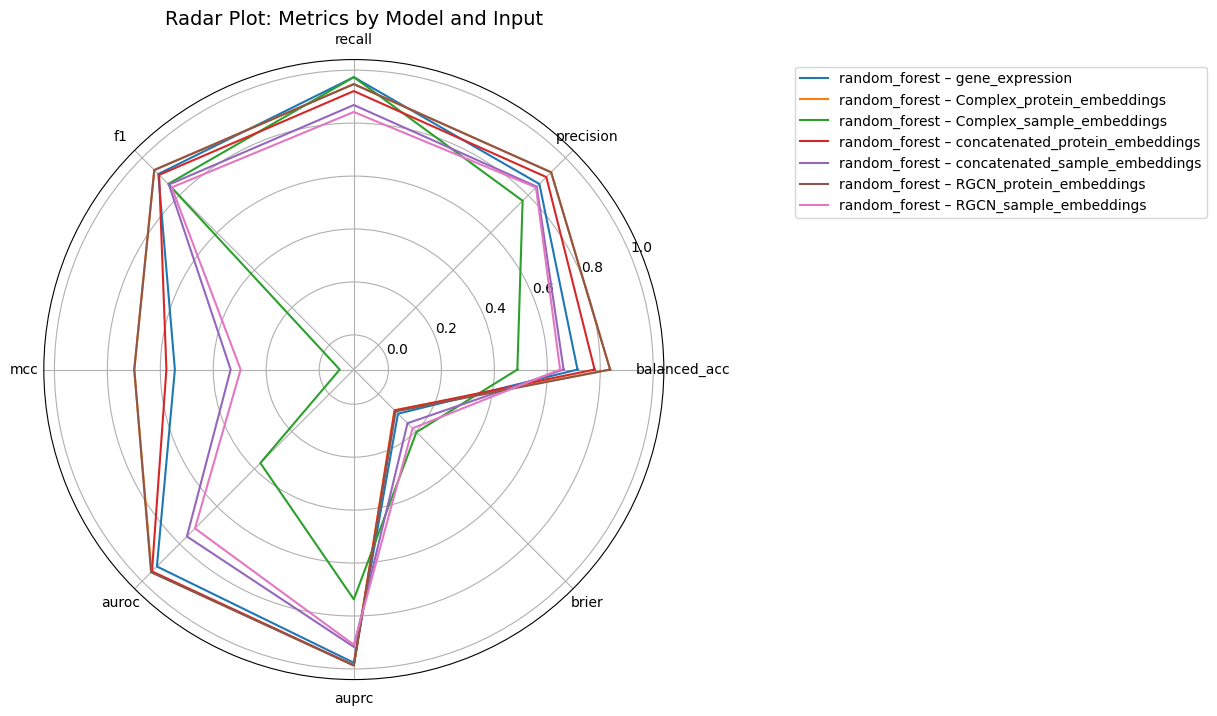

In [38]:
collector = ResultsCollector()
random_forest_filtered_results=filtered_results[filtered_results['model']=='random_forest']
dashboard = DashboardVisualizer(random_forest_filtered_results, collector)
dashboard.plot_radar()

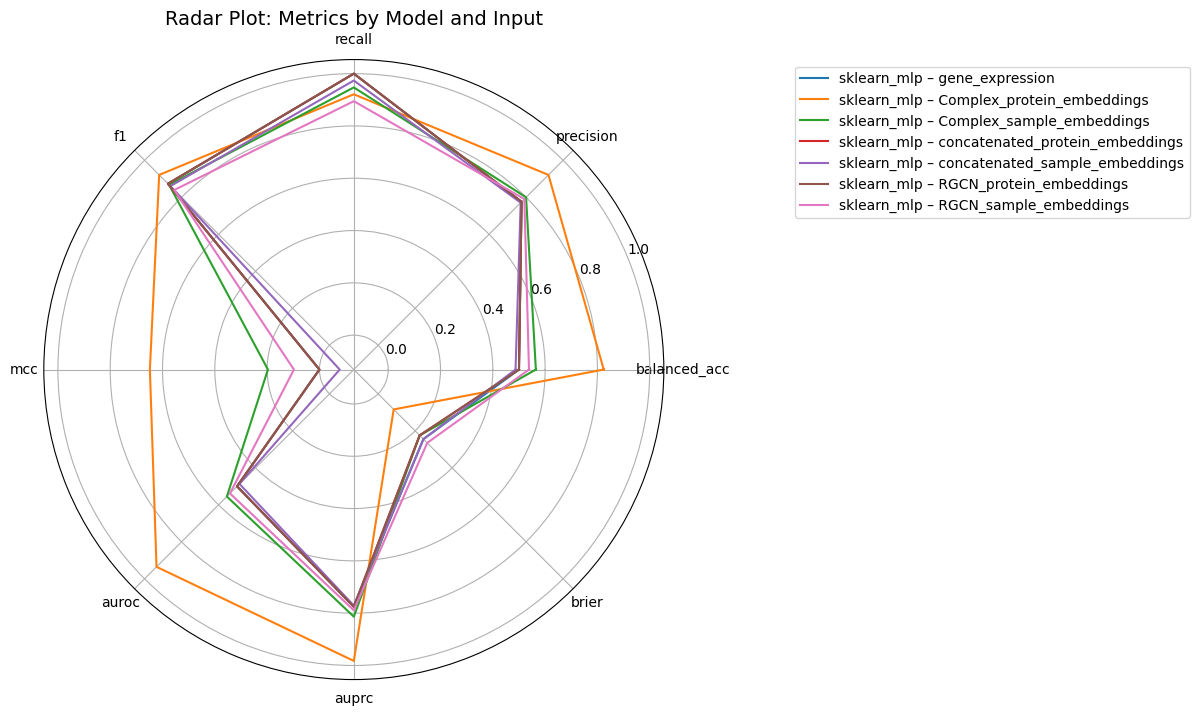

In [39]:
collector = ResultsCollector()
sklearn_mlp_filtered_results=filtered_results[filtered_results['model']=='sklearn_mlp']
dashboard = DashboardVisualizer(sklearn_mlp_filtered_results, collector)
dashboard.plot_radar()

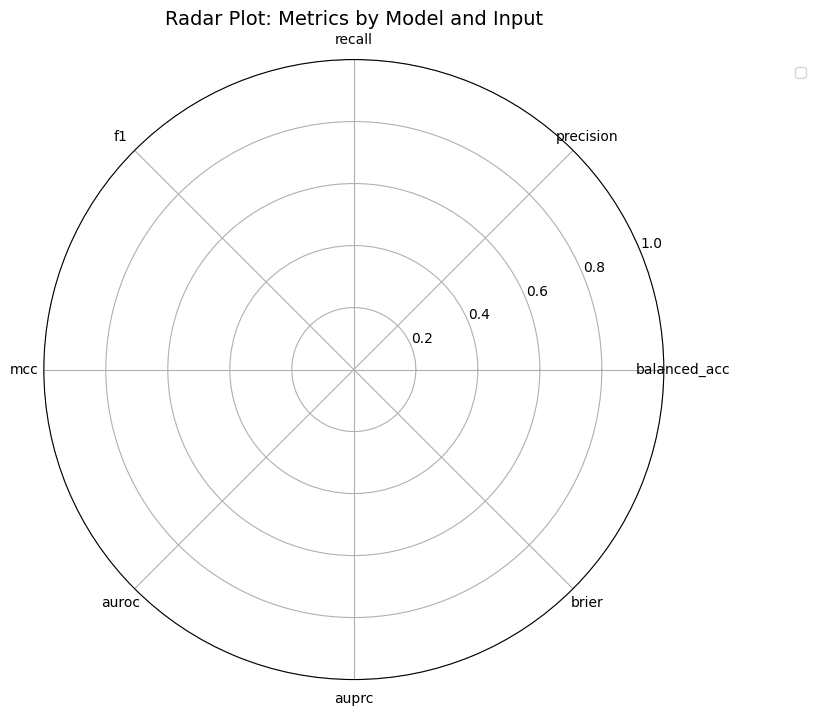

In [26]:
collector = ResultsCollector()
pytorch_mlp_filtered_results=filtered_results[filtered_results['model']=='pytorch_mlp']
dashboard = DashboardVisualizer(pytorch_mlp_filtered_results, collector)
dashboard.plot_radar()

### 5. scatter plot

somparing 2 strong(?) models, each point is a dataset+metrix, can have shape of point by metric and color by dataset (or just for one metric for now)

In [40]:
metric='precision'

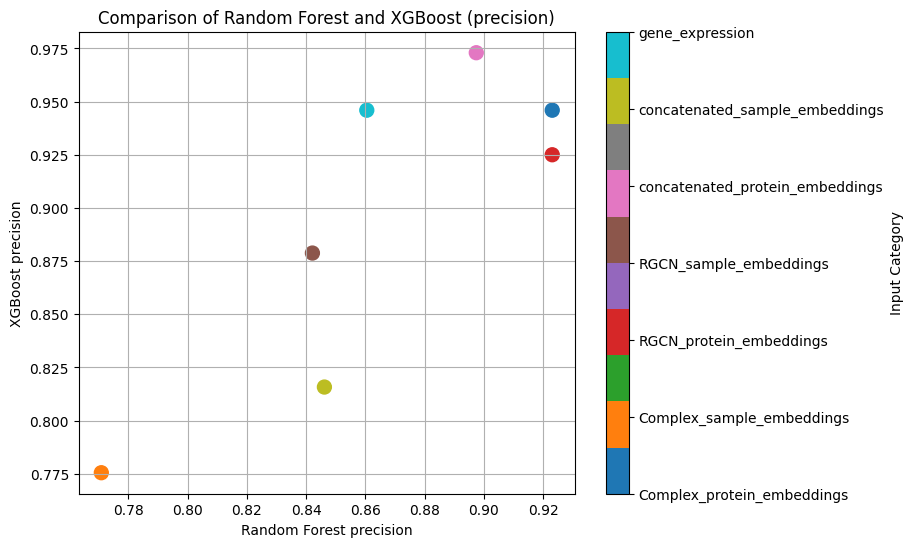

In [41]:
import matplotlib.pyplot as plt

rf = filtered_results[filtered_results['model'] == 'random_forest'][['input', metric]]
xgb = filtered_results[filtered_results['model'] == 'xgboost'][['input', metric]]

merged = rf.merge(xgb, on='input', suffixes=('_rf', '_xgb'))

plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    merged[metric + '_rf'],
    merged[metric + '_xgb'],
    s=100,
    c=merged['input'].astype('category').cat.codes,
    cmap='tab10'
)

plt.xlabel('Random Forest ' + metric)
plt.ylabel('XGBoost ' + metric)
plt.title('Comparison of Random Forest and XGBoost (' + metric + ')')
plt.grid()

cbar = plt.colorbar(scatter)
cbar.set_label('Input Category')
cbar.set_ticks(range(len(merged['input'].astype('category').cat.categories)))
cbar.set_ticklabels(merged['input'].astype('category').cat.categories)

plt.show()


### 6. rank dist plot
showing the rank distribution of models over datasets for a given metric

In [42]:
metric='balanced_accuracy'

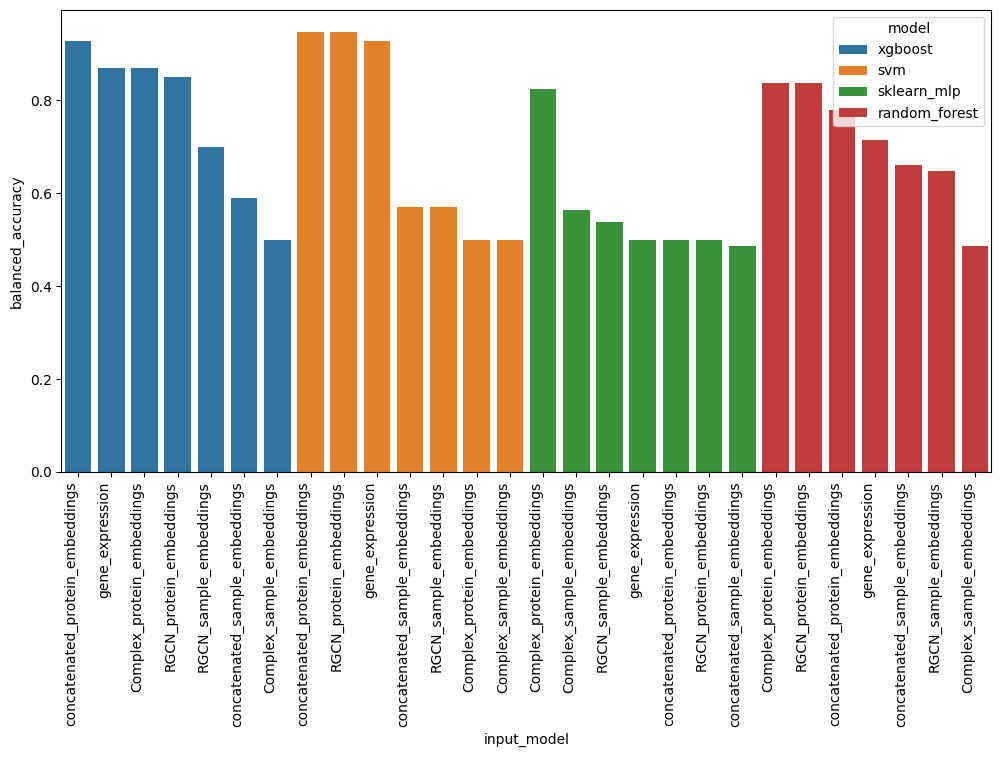

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# -- df sorted by model then by metric
sorted_df=filtered_results.sort_values(by=['model', metric],ascending=False)
sorted_df['input_model']=sorted_df['input']+'_'+sorted_df['model']

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=sorted_df, x='input_model', y=metric, hue='model', dodge=False, palette='tab10')

ax.set_xticks(range(len(sorted_df)))
ax.set_xticklabels(sorted_df['input'], rotation=90, ha='right', fontsize=10)

# # bar plot and color by model
# plt.figure(figsize=(12, 6))
# sns.barplot(data=sorted_df, x='input_model', y=metric,hue='model')
# plt.title(f'Model Performance by {metric.capitalize()}')
# plt.xlabel('trained model')
# plt.ylabel(metric.capitalize())
# plt.xticks(rotation=45, ha='right', fontsize=10)
# plt.legend(title='Model')
# plt.tight_layout()
plt.show()